# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data exploration, data preprocessing, and feature engineering if necessary. 
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Step 0: import the specific packages

In [1]:
import pandas as pd
import sklearn.model_selection
# import numpy as np
import sklearn.compose
import sklearn.preprocessing
# import sklearn.svm
import sklearn.metrics
import sklearn.linear_model

## Step 1: Load the .csv file

In [2]:
df = pd.read_csv('CSV files/housing.csv')
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


## Step 2: Splitting the Dataset

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print ('df size: ', df.shape)
print ('df_train size: ', df_train.shape)
print ('df_test size: ', df_test.shape)

df size:  (545, 14)
df_train size:  (408, 14)
df_test size:  (137, 14)


# Data Preprocessing and Feature Engineering

## Step 3: Identify the implicit missing values of attributes and replace them with an explicit missing value

In [5]:
df_train.dtypes
# df_test.dtypes

id                    int64
price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
stories.1             int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

## Step 3.1: Checking for Null or NaN in the Dataset

In [6]:
df_train.isnull().sum()
# df_test.isnull().sum()

id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
stories.1           0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df_train.isna().sum()
# df_train.isna().sum()

id                  0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
stories.1           0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Step 3.2: Check every column for possible implicit values

id
325    1
46     1
154    1
309    1
97     1
      ..
461    1
473    1
337    1
275    1
261    1
Name: count, Length: 408, dtype: int64


<Axes: xlabel='id'>

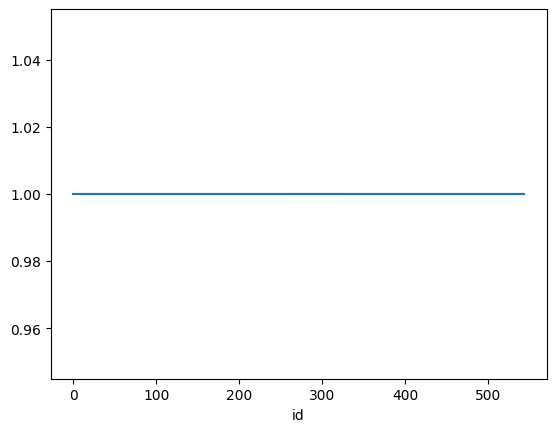

In [9]:
print (df_train['id'].value_counts())
df_train['id'].value_counts().plot()

# Visualization libraries to look at it in 1 chart (Look for it online)***

price
4200000    16
3500000    14
4900000    11
5600000     8
2940000     8
           ..
5803000     1
4543000     1
2100000     1
5425000     1
5565000     1
Name: count, Length: 188, dtype: int64


<Axes: xlabel='price'>

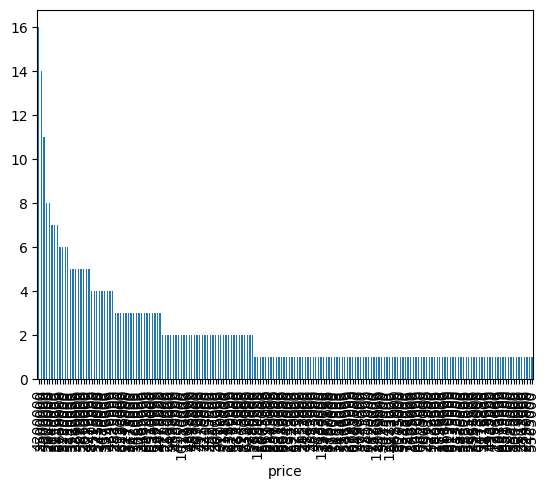

In [10]:
print (df_train['price'].value_counts())
df_train['price'].value_counts().plot(kind = 'bar')

area
6000     16
3000     11
4500     10
3600      8
4040      6
         ..
10240     1
5948      1
4075      1
2520      1
7770      1
Name: count, Length: 240, dtype: int64


<Axes: xlabel='area'>

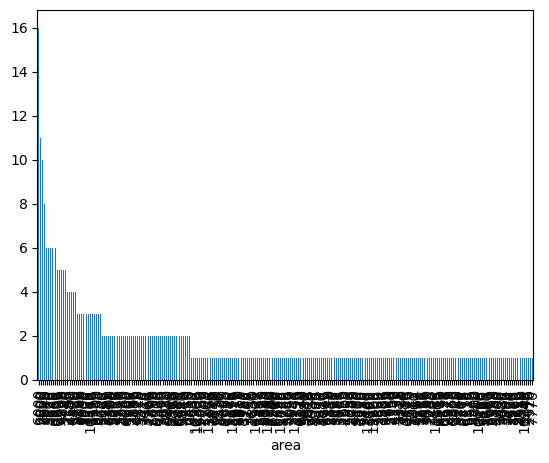

In [11]:
print (df_train['area'].value_counts())
df_train['area'].value_counts().plot(kind = 'bar')

bedrooms
3    219
2    109
4     69
5      8
1      2
6      1
Name: count, dtype: int64


<Axes: xlabel='bedrooms'>

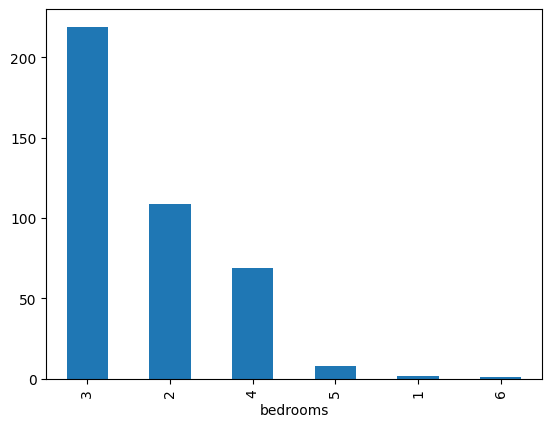

In [12]:
print (df_train['bedrooms'].value_counts())
df_train['bedrooms'].value_counts().plot(kind = 'bar')

bathrooms
1    298
2    100
3      9
4      1
Name: count, dtype: int64


<Axes: xlabel='bathrooms'>

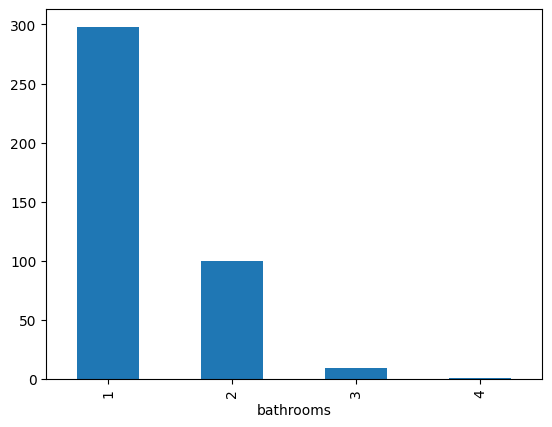

In [13]:
print (df_train['bathrooms'].value_counts())
df_train['bathrooms'].value_counts().plot(kind = 'bar')

## Try to do the same thing for all of the columns... There has to be an easier way.

## Step 4: Now we use the df_train

In [15]:
x_train = df_train.drop(['id','price'], axis = 1)
y_train = df_train['price']

x_test = df_test.drop(['id','price'], axis = 1)
y_test = df_test['price']

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (408, 12)
y_train size:  (408,)
x_test size:  (137, 12)
y_test size:  (137,)


In [16]:
numerical_attributes = x_train.select_dtypes(include = ['int64','float64']).columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (408, 12)
y_train size:  (408,)
x_test size:  (137, 12)
y_test size:  (137,)


In [17]:
# model = sklearn.svm.SVR()
model1 = sklearn.linear_model.LinearRegression() # We should use the linear regression module
model1.fit(x_train, y_train)

LinearRegression()

## Step 6: Model Assessment

In [18]:
y_predicted = model1.predict(x_test)
Mean_sq_err = sklearn.metrics.mean_squared_error(y_test, y_predicted)

print(Mean_sq_err) # Test the Mean squared error between the different models, the one who has the smallest m_s_error is better

1232243965781.3345


# TODO: Create a model while using Logistic Regression and KNN
Use the logistic_regression.ipynb found on supervised_learning